# KE5105 - Building Electrical Consumption Forecasting

# Modelling 1 - Preliminary model using SDE-3 data

## Load libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

Using TensorFlow backend.


## Load data

In [2]:
sde3_1_df = pd.read_csv(os.path.join('source', 'sde3-data', 'no_nan', 'sde3_no_nan1.csv'), parse_dates=True)

In [3]:
sde3_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 28 columns):
Pt_timeStamp                        1380 non-null object
PWM.SDE3.IC1                        1380 non-null int64
PWM.SDE3.IC2                        1380 non-null float64
PWM.SDE3.MCC..AC.                   1380 non-null float64
PWM.CELC.IC1                        1380 non-null float64
PWM.CELC.IC2                        1380 non-null float64
PWM.SDE1                            1380 non-null float64
PWM.SDE2.SSB                        1380 non-null float64
PWM.SDE2.AC                         1380 non-null float64
PWM.SDE3.Ext                        1380 non-null float64
PWM.Street.Light                    1380 non-null float64
BTU.SDE3.Chiller.Plant              1380 non-null float64
BTU.SDE3.2                          1380 non-null float64
BTU.SDE3.1.2                        1380 non-null float64
PWM.SDE3.IC1_30min_avg              1380 non-null int64
PWM.SDE3.IC2_30min_avg      

In [4]:
sde3_1_df.iloc[:5, :5]

,Pt_timeStamp,PWM.SDE3.IC1,PWM.SDE3.IC2,PWM.SDE3.MCC..AC.,PWM.CELC.IC1
0,2016-06-01 00:30:00,9098611,8306487.5,5476307.0,1269571.50
1,2016-06-01 01:00:00,9098669,8306495.0,5476307.5,1269572.00
2,2016-06-01 01:30:00,9098729,8306501.0,5476308.0,1269572.63
3,2016-06-01 02:00:00,9098788,8306509.0,5476310.0,1269573.50
4,2016-06-01 02:30:00,9098845,8306517.0,5476311.0,1269574.00


In [5]:
sde3_1_df.iloc[:5, 5:11]

,PWM.CELC.IC2,PWM.SDE1,PWM.SDE2.SSB,PWM.SDE2.AC,PWM.SDE3.Ext,PWM.Street.Light
0,547602.31,899566.94,2505527.25,224610.72,868196.25,85832.10
1,547606.06,899573.25,2505536.25,224610.72,868200.31,85834.24
2,547610.00,899579.50,2505547.00,224610.72,868204.38,85836.35
3,547613.69,899585.94,2505557.25,224610.72,868208.50,85838.46
4,547617.50,899591.88,2505566.25,224610.72,868212.63,85840.59


In [6]:
sde3_1_df.iloc[:5, 11:15]

,BTU.SDE3.Chiller.Plant,BTU.SDE3.2,BTU.SDE3.1.2,PWM.SDE3.IC1_30min_avg
0,4150560.5,943278.94,1449962.88,60
1,4150560.5,943278.94,1449962.88,58
2,4150560.5,943278.94,1449962.88,60
3,4150560.5,943278.94,1449962.88,59
4,4150560.5,943278.94,1449962.88,57


In [7]:
sde3_1_df.iloc[:5, 15:18]

,PWM.SDE3.IC2_30min_avg,PWM.SDE3.MCC..AC._30min_avg,PWM.CELC.IC1_30min_avg
0,8.5,1.5,1.00
1,7.5,0.5,0.50
2,6.0,0.5,0.63
3,8.0,2.0,0.87
4,8.0,1.0,0.50


In [8]:
sde3_1_df.iloc[:5, 18:21]

,PWM.CELC.IC2_30min_avg,PWM.SDE1_30min_avg,PWM.SDE2.SSB_30min_avg
0,3.81,6.63,10.25
1,3.75,6.31,9.00
2,3.94,6.25,10.75
3,3.69,6.44,10.25
4,3.81,5.94,9.00


In [9]:
sde3_1_df.iloc[:5, 21:24]

,PWM.SDE2.AC_30min_avg,PWM.SDE3.Ext_30min_avg,PWM.Street.Light_30min_avg
0,0,4.12,2.09
1,0,4.06,2.14
2,0,4.07,2.11
3,0,4.12,2.11
4,0,4.13,2.13


In [10]:
sde3_1_df.iloc[:5, 24:27]

,BTU.SDE3.Chiller.Plant_30min_avg,BTU.SDE3.2_30min_avg,BTU.SDE3.1.2_30min_avg
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [11]:
sde3_1_df.iloc[:5, 27:]

,PWM_30min_avg
0,39.10
1,39.24
2,37.75
3,37.52
4,38.49


In [12]:
sde3_1_df.loc[:, 'Pt_timeStamp'] = pd.to_datetime(sde3_1_df['Pt_timeStamp'])

In [13]:
sde3_1_df['Pt_timeStamp'][:5]

0   2016-06-01 00:30:00
1   2016-06-01 01:00:00
2   2016-06-01 01:30:00
3   2016-06-01 02:00:00
4   2016-06-01 02:30:00
Name: Pt_timeStamp, dtype: datetime64[ns]

In [14]:
sde3_1_df.set_index('Pt_timeStamp', drop=True, inplace=True)

In [15]:
sde3_1_df.iloc[:5, :4]

,PWM.SDE3.IC1,PWM.SDE3.IC2,PWM.SDE3.MCC..AC.,PWM.CELC.IC1
Pt_timeStamp,,,,
2016-06-01 00:30:00,9098611,8306487.5,5476307.0,1269571.50
2016-06-01 01:00:00,9098669,8306495.0,5476307.5,1269572.00
2016-06-01 01:30:00,9098729,8306501.0,5476308.0,1269572.63
2016-06-01 02:00:00,9098788,8306509.0,5476310.0,1269573.50
2016-06-01 02:30:00,9098845,8306517.0,5476311.0,1269574.00


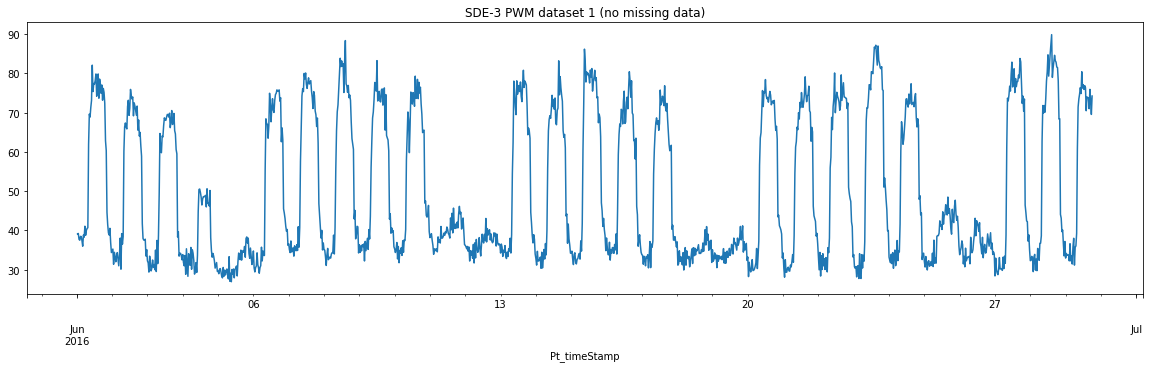

In [16]:
sde3_1_df.loc[:, 'PWM_30min_avg'].plot(figsize=(20, 5), title='SDE-3 PWM dataset 1 (no missing data)')

## Normalise the data for modelling

In [17]:
scaler = StandardScaler()
scaler.fit(sde3_1_df['PWM_30min_avg'].values.reshape(-1, 1))
sde3_1_df.loc[:, 'PWM_norm'] = scaler.transform(sde3_1_df['PWM_30min_avg'].values.reshape(-1, 1))
sde3_1_df.iloc[:5, -4:]

,BTU.SDE3.2_30min_avg,BTU.SDE3.1.2_30min_avg,PWM_30min_avg,PWM_norm
Pt_timeStamp,,,,
2016-06-01 00:30:00,0.0,0.0,39.10,-0.576075
2016-06-01 01:00:00,0.0,0.0,39.24,-0.568442
2016-06-01 01:30:00,0.0,0.0,37.75,-0.649682
2016-06-01 02:00:00,0.0,0.0,37.52,-0.662222
2016-06-01 02:30:00,0.0,0.0,38.49,-0.609334


## Split the data into train and test set

In [48]:
# Generator which yields a batch of data each time it is called.
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    
    # Set the data max index limit
    if max_index is None:
        max_index = len(data) - delay - 1
    else:
        max_index = max_index - delay
    # Set the current data start index limit
    i = min_index + lookback
    # print('\nstarting generator ... i = %d\n' % i)
    
    while 1:
        # print('i = %d' % i)
        if shuffle:
            # Randomly select a batch from data 
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            # Select a batch starting from i
            if i + batch_size >= max_index:
                # print('\nrestarting generator ... i = %d\n' % i)
                i = min_index + lookback
                # print('reset i ... i = %d' % i)
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        
        # Each row in samples is a training sample from t-lookback to t-1.
        samples = np.zeros((len(rows),
                            lookback // step,
                            data.shape[-1]))
        # Each value in targets is a training label at t+delay.
        targets = np.zeros((len(rows),))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][0]
        
        yield samples, targets

In [49]:
train_max_idx = int(len(sde3_1_df) / 4 * 2)
val_max_idx = int(len(sde3_1_df) / 4 * 3)
print('train indices = [%d, %d], len = %d' % (0, train_max_idx-1, train_max_idx))
print('validation indices = [%d, %d, len = %d]' % (train_max_idx, val_max_idx-1, val_max_idx - train_max_idx))
print('test indices = [%d, %d], len = %d' % (val_max_idx, len(sde3_1_df)-1, len(sde3_1_df) - val_max_idx))

train indices = [0, 689], len = 690
validation indices = [690, 1034, len = 345]
test indices = [1035, 1379], len = 345


In [50]:
lookback = 48  # 1 day; each day has 48 observations
step = 1  # sampling rate used for the lookback period
delay = 0  # 1 step ahead prediction
# batch_size = 128
batch_size = 32

In [51]:
# Generators for train, validation and test sets.
train_gen = generator(sde3_1_df['PWM_norm'].values.reshape((-1, 1)),
                      lookback=lookback, delay=delay, min_index=0, max_index=train_max_idx,
                      batch_size=batch_size, step=step)
val_gen = generator(sde3_1_df['PWM_norm'].values.reshape((-1, 1)),
                    lookback=lookback, delay=delay, min_index=train_max_idx, max_index=val_max_idx,
                    batch_size=batch_size, step=step)
test_gen = generator(sde3_1_df['PWM_norm'].values.reshape((-1, 1)),
                     lookback=lookback, delay=delay, min_index=val_max_idx, max_index=None,
                     batch_size=batch_size, step=step)

In [52]:
train_steps = (train_max_idx - lookback + 1) // batch_size
val_steps = (val_max_idx - train_max_idx - lookback + 1) // batch_size
test_steps = (len(sde3_1_df) - val_max_idx - lookback + 1) // batch_size
print('train steps = %d\nvalidation steps = %d\ntest steps = %d' % (train_steps, val_steps, test_steps))

In [53]:
# samples, targets = next(val_gen)
# samples[0]

In [115]:
# Calculate a simple baseline for model accuracy using MAE. Baseline model predicts label at t as label at t-1
# (LOCF last observation carry forward)
batch_maes = []
preds_locf = []
for step in range(val_steps):
    samples, targets = next(val_gen)
    a_pred = samples[:, -1, 0]
    preds_locf.append(a_pred)
    mae = np.mean(np.abs(a_pred - targets))
    batch_maes.append(mae)
print('MAE = %f' % (np.mean(batch_maes)))

MAE = 0.158473


In [121]:
print('Actual MAE without normalization = %f' % (np.mean(batch_maes) * sde3_1_df['PWM_30min_avg'].values.std()))

Actual MAE without normalization = 2.906528


In [122]:
preds_locf[0]

array([ 0.95220925,  0.91731442,  1.15612591,  1.13922373,  0.95275448,
        1.27226027,  1.40802296,  0.95929726,  0.97892561,  1.24827007,
        1.32405728,  1.16266869,  1.44618918,  1.67736743,  1.5514189 ,
        1.32405728,  1.55196413,  1.1043289 ,  1.0819744 ,  0.72048578,
        0.72866425,  0.4647721 ,  0.75483537, -0.19168688, -0.30836646,
       -0.74564229, -0.65949568, -0.58697987, -0.73255673, -0.83069844,
       -0.86286711, -0.87268128])

In [123]:
preds_locf = scaler.inverse_transform(np.concatenate(preds_locf))

In [124]:
preds_locf.shape

(288,)

In [126]:
preds_locf[:10]

array([ 67.13,  66.49,  70.87,  70.56,  67.14,  73.  ,  75.49,  67.26,
        67.62,  72.56])

## Train a Baseline Recurrent Neural Network

In [105]:
model = Sequential()
model.add(layers.GRU(64, input_shape=(None, sde3_1_df['PWM_norm'].values.reshape((-1, 1)).shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')

In [106]:
history = model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=10,
                              validation_data=val_gen, validation_steps=val_steps, workers=1, use_multiprocessing=False)

Epoch 1/10


 1/20 [>.............................] - ETA: 22s - loss: 0.9498

 3/20 [===>..........................] - ETA: 7s - loss: 0.8026 

 5/20 [======>.......................] - ETA: 4s - loss: 0.6977

 7/20 [=========>....................] - ETA: 2s - loss: 0.6487

 9/20 [============>.................] - ETA: 1s - loss: 0.6152

11/20 [===============>..............] - ETA: 1s - loss: 0.5755

13/20 [==================>...........] - ETA: 0s - loss: 0.5519

15/20 [=====================>........] - ETA: 0s - loss: 0.5014

17/20 [========================>.....] - ETA: 0s - loss: 0.4545

19/20 [===========================>..] - ETA: 0s - loss: 0.4504

20/20 [==============================] - 2s 105ms/step - loss: 0.4435 - val_loss: 0.2563


Epoch 2/10
 1/20 [>.............................] - ETA: 0s - loss: 0.3196

 3/20 [===>..........................] - ETA: 0s - loss: 0.3194

 5/20 [======>.......................] - ETA: 0s - loss: 0.2592

 7/20 [=========>....................] - ETA: 0s - loss: 0.2474

 9/20 [============>.................] - ETA: 0s - loss: 0.2629

11/20 [===============>..............] - ETA: 0s - loss: 0.2676

13/20 [==================>...........] - ETA: 0s - loss: 0.2742

15/20 [=====================>........] - ETA: 0s - loss: 0.2571

17/20 [========================>.....] - ETA: 0s - loss: 0.2379

19/20 [===========================>..] - ETA: 0s - loss: 0.2460

20/20 [==============================] - 1s 41ms/step - loss: 0.2466 - val_loss: 0.2054


Epoch 3/10


 1/20 [>.............................] - ETA: 1s - loss: 0.2374

 3/20 [===>..........................] - ETA: 0s - loss: 0.2450

 5/20 [======>.......................] - ETA: 0s - loss: 0.2051

 7/20 [=========>....................] - ETA: 0s - loss: 0.1966

 9/20 [============>.................] - ETA: 0s - loss: 0.2083

11/20 [===============>..............] - ETA: 0s - loss: 0.2116

13/20 [==================>...........] - ETA: 0s - loss: 0.2175

15/20 [=====================>........] - ETA: 0s - loss: 0.2059

17/20 [========================>.....] - ETA: 0s - loss: 0.1925

19/20 [===========================>..] - ETA: 0s - loss: 0.1997

20/20 [==============================] - 1s 40ms/step - loss: 0.1993 - val_loss: 0.1756


Epoch 4/10


 1/20 [>.............................] - ETA: 0s - loss: 0.2105

 3/20 [===>..........................] - ETA: 0s - loss: 0.2033

 5/20 [======>.......................] - ETA: 0s - loss: 0.1792

 7/20 [=========>....................] - ETA: 0s - loss: 0.1787

 9/20 [============>.................] - ETA: 0s - loss: 0.1868

11/20 [===============>..............] - ETA: 0s - loss: 0.1885

13/20 [==================>...........] - ETA: 0s - loss: 0.1943

15/20 [=====================>........] - ETA: 0s - loss: 0.1852

17/20 [========================>.....] - ETA: 0s - loss: 0.1743

19/20 [===========================>..] - ETA: 0s - loss: 0.1821

20/20 [==============================] - 1s 42ms/step - loss: 0.1819 - val_loss: 0.1723


Epoch 5/10


 1/20 [>.............................] - ETA: 0s - loss: 0.2042

 3/20 [===>..........................] - ETA: 0s - loss: 0.1951

 5/20 [======>.......................] - ETA: 0s - loss: 0.1729

 7/20 [=========>....................] - ETA: 0s - loss: 0.1719

 9/20 [============>.................] - ETA: 0s - loss: 0.1786

11/20 [===============>..............] - ETA: 0s - loss: 0.1809

13/20 [==================>...........] - ETA: 0s - loss: 0.1860

15/20 [=====================>........] - ETA: 0s - loss: 0.1779

17/20 [========================>.....] - ETA: 0s - loss: 0.1681

19/20 [===========================>..] - ETA: 0s - loss: 0.1759

20/20 [==============================] - 1s 41ms/step - loss: 0.1760 - val_loss: 0.1684


Epoch 6/10


 1/20 [>.............................] - ETA: 0s - loss: 0.2012

 3/20 [===>..........................] - ETA: 0s - loss: 0.1904

 5/20 [======>.......................] - ETA: 0s - loss: 0.1692

 7/20 [=========>....................] - ETA: 0s - loss: 0.1676

 9/20 [============>.................] - ETA: 0s - loss: 0.1734

11/20 [===============>..............] - ETA: 0s - loss: 0.1757

13/20 [==================>...........] - ETA: 0s - loss: 0.1810

15/20 [=====================>........] - ETA: 0s - loss: 0.1729

17/20 [========================>.....] - ETA: 0s - loss: 0.1637

19/20 [===========================>..] - ETA: 0s - loss: 0.1713

20/20 [==============================] - 1s 40ms/step - loss: 0.1714 - val_loss: 0.1682


Epoch 7/10


 1/20 [>.............................] - ETA: 0s - loss: 0.1966

 2/20 [==>...........................] - ETA: 0s - loss: 0.1871

 4/20 [=====>........................] - ETA: 0s - loss: 0.1809

 6/20 [========>.....................] - ETA: 0s - loss: 0.1534

 8/20 [===========>..................] - ETA: 0s - loss: 0.1651

10/20 [==============>...............] - ETA: 0s - loss: 0.1734

12/20 [=================>............] - ETA: 0s - loss: 0.1767

14/20 [====================>.........] - ETA: 0s - loss: 0.1749

16/20 [=======================>......] - ETA: 0s - loss: 0.1648

18/20 [==========================>...] - ETA: 0s - loss: 0.1662

20/20 [==============================] - 1s 41ms/step - loss: 0.1685 - val_loss: 0.1636


Epoch 8/10
 1/20 [>.............................] - ETA: 0s - loss: 0.1947

 3/20 [===>..........................] - ETA: 0s - loss: 0.1842

 5/20 [======>.......................] - ETA: 0s - loss: 0.1641

 7/20 [=========>....................] - ETA: 0s - loss: 0.1632

 9/20 [============>.................] - ETA: 0s - loss: 0.1681

11/20 [===============>..............] - ETA: 0s - loss: 0.1707

13/20 [==================>...........] - ETA: 0s - loss: 0.1759

15/20 [=====================>........] - ETA: 0s - loss: 0.1686

17/20 [========================>.....] - ETA: 0s - loss: 0.1599

19/20 [===========================>..] - ETA: 0s - loss: 0.1671

20/20 [==============================] - 1s 40ms/step - loss: 0.1672 - val_loss: 0.1628


Epoch 9/10


 1/20 [>.............................] - ETA: 0s - loss: 0.1943

 3/20 [===>..........................] - ETA: 0s - loss: 0.1821

 5/20 [======>.......................] - ETA: 0s - loss: 0.1630

 7/20 [=========>....................] - ETA: 0s - loss: 0.1619

 9/20 [============>.................] - ETA: 0s - loss: 0.1659

11/20 [===============>..............] - ETA: 0s - loss: 0.1690

13/20 [==================>...........] - ETA: 0s - loss: 0.1742

15/20 [=====================>........] - ETA: 0s - loss: 0.1671

17/20 [========================>.....] - ETA: 0s - loss: 0.1586

19/20 [===========================>..] - ETA: 0s - loss: 0.1658

20/20 [==============================] - 1s 41ms/step - loss: 0.1657 - val_loss: 0.1554


Epoch 10/10


 1/20 [>.............................] - ETA: 0s - loss: 0.1870

 3/20 [===>..........................] - ETA: 0s - loss: 0.1782

 5/20 [======>.......................] - ETA: 0s - loss: 0.1610

 6/20 [========>.....................] - ETA: 0s - loss: 0.1499

 8/20 [===========>..................] - ETA: 0s - loss: 0.1593

10/20 [==============>...............] - ETA: 0s - loss: 0.1673

12/20 [=================>............] - ETA: 0s - loss: 0.1709

14/20 [====================>.........] - ETA: 0s - loss: 0.1700

16/20 [=======================>......] - ETA: 0s - loss: 0.1607

18/20 [==========================>...] - ETA: 0s - loss: 0.1619

20/20 [==============================] - 1s 44ms/step - loss: 0.1641 - val_loss: 0.1568


In [107]:
history.history

{'loss': [0.44351281449198721,
  0.24657609686255455,
  0.19932043738663197,
  0.18189499378204346,
  0.17603515237569808,
  0.17141446806490421,
  0.16845295391976833,
  0.16723626144230366,
  0.16572077274322511,
  0.16410800963640212],
 'val_loss': [0.25628720803393257,
  0.20543668708867496,
  0.17561285694440207,
  0.17226803633901808,
  0.1684079882171419,
  0.16823195086585152,
  0.16356435832050112,
  0.16275623523526722,
  0.15542062123616537,
  0.15680626200305092]}

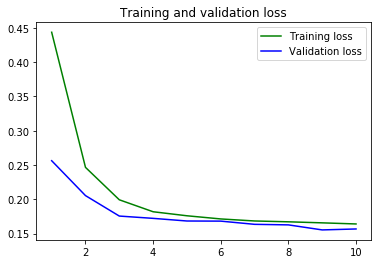

In [108]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.figure()
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [109]:
pred_val_gen = generator(sde3_1_df['PWM_norm'].values.reshape((-1, 1)),
                         lookback=lookback, delay=delay, min_index=train_max_idx, max_index=val_max_idx,
                         batch_size=batch_size, step=step)
preds = model.predict_generator(pred_val_gen, steps=val_steps)

In [110]:
val_steps

9

In [111]:
len(preds)

288

In [112]:
preds.shape

(288, 1)

In [113]:
preds = scaler.inverse_transform(preds)
preds[:10]

array([[ 35.15626144],
       [ 36.06850815],
       [ 35.67976761],
       [ 34.15130615],
       [ 37.96485519],
       [ 45.45159149],
       [ 46.89232254],
       [ 47.13856125],
       [ 47.61008072],
       [ 49.79339218]], dtype=float32)

Text(0.5,1,'SDE-3 PWM dataset 1 validation vs predicted')

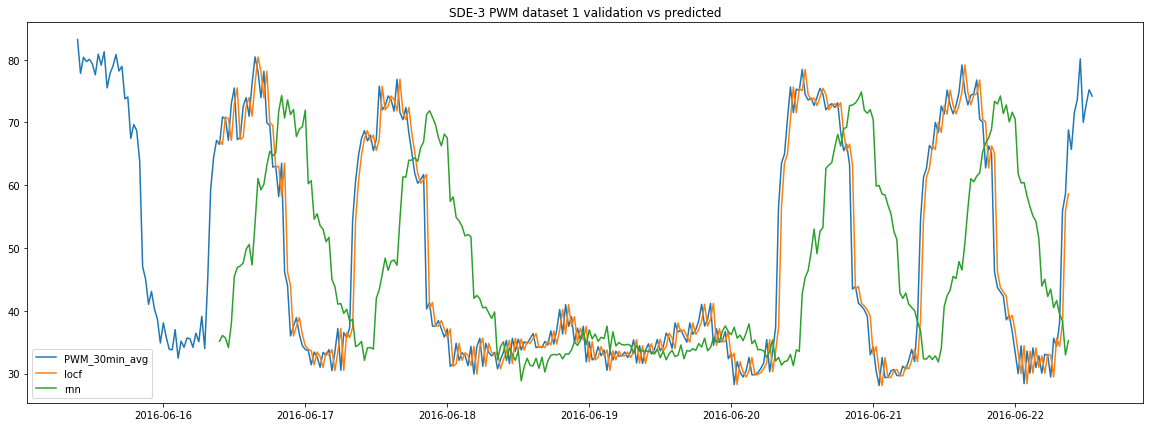

In [114]:
plt.figure(figsize=(20, 7))
plt.plot(sde3_1_df.iloc[train_max_idx:(val_max_idx-1), sde3_1_df.columns.get_loc('PWM_30min_avg')])
plt.plot(sde3_1_df.index[(train_max_idx+lookback):(train_max_idx+lookback+len(preds_locf))], preds_locf, label='locf')
plt.plot(sde3_1_df.index[(train_max_idx+lookback):(train_max_idx+lookback+len(preds))], preds, label='rnn')
plt.legend()
plt.title('SDE-3 PWM dataset 1 validation vs predicted')